In [9]:
import numpy as np
import multiprocessing as mp # multiprocessing
import matplotlib.pyplot as plt
import sys

In [10]:
def collapse(gv, NC): 
    na = np.shape(gv)[2]//NC
    Nu = np.shape(gv)[0]
    cgv = np.zeros((Nu,Nu,na), dtype='complex128')
    bb=0
    for ii in range(na):
        aa = bb
        bb = aa+NC
        cgv[:,:,ii] = np.mean(gv[:,:,aa:bb], axis=-1)  
    return cgv

In [33]:
def read_vcg(filename, nc, NC, xn):
    headersize = (nc+3)*np.float64().itemsize
    aa = np.fromfile(filename, dtype='float64', count=headersize, offset=0)      
    FWHM, dUg, f, nua = aa[0], aa[1], aa[2], aa[3:nc+3] # header
    hinfo = (FWHM, dUg, f, nua)
    aa = np.fromfile(filename, dtype='complex128', count=-1, offset=headersize)
    Nu = int(np.sqrt(len(aa)/(3*nc)))
    NN = Nu*Nu*nc
    GR = collapse(np.reshape(aa[:NN], (Nu, Nu, nc))[xn:Nu-xn, xn:Nu-xn, :], NC)
    GL = collapse(np.reshape(aa[NN:2*NN], (Nu, Nu, nc))[xn:Nu-xn, xn:Nu-xn, :], NC)
    AA = collapse(np.reshape(aa[2*NN:3*NN], (Nu, Nu, nc))[xn:Nu-xn, xn:Nu-xn, :], NC)
    return hinfo, GR, GL, np.real(AA), np.imag(AA)

In [34]:
hinfo, vR, vL, aR, aL = read_vcg('/lfs/usrhome/phd/ph22d020/scratch/TGE/TGE/GV_data', 749, 1, 0) 

In [35]:
hinfo

(1380.0,
 1.069287800465425,
 0.6,
 array([1.39255008e+08, 1.39295008e+08, 1.39335008e+08, 1.39375008e+08,
        1.39415008e+08, 1.39455008e+08, 1.39495008e+08, 1.39535008e+08,
        1.39575008e+08, 1.39615008e+08, 1.39655008e+08, 1.39695008e+08,
        1.39735008e+08, 1.39775008e+08, 1.39815008e+08, 1.39855008e+08,
        1.39895008e+08, 1.39935008e+08, 1.39975008e+08, 1.40015008e+08,
        1.40055008e+08, 1.40095008e+08, 1.40135008e+08, 1.40175008e+08,
        1.40215008e+08, 1.40255008e+08, 1.40295008e+08, 1.40335008e+08,
        1.40375008e+08, 1.40415008e+08, 1.40455008e+08, 1.40495008e+08,
        1.40535008e+08, 1.40575008e+08, 1.40615008e+08, 1.40655008e+08,
        1.40695008e+08, 1.40735008e+08, 1.40775008e+08, 1.40815008e+08,
        1.40855008e+08, 1.40895008e+08, 1.40935008e+08, 1.40975008e+08,
        1.41015008e+08, 1.41055008e+08, 1.41095008e+08, 1.41135008e+08,
        1.41175008e+08, 1.41215008e+08, 1.41255008e+08, 1.41295008e+08,
        1.41335008e+08, 1.413

In [36]:
vL.shape

(457, 457, 749)

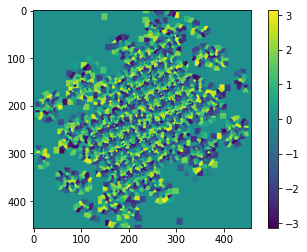

In [37]:
plt.imshow(np.angle(vL[:,:,700]))
plt.colorbar()

In [38]:
sys.exit()

SystemExit: 

In [ ]:
eg1 = np.load('/lfs/usrhome/phd/ph22d020/scratch/TGE/TGE/eg.npy')

In [ ]:
eg1.shape

In [ ]:
plt.imshow(((eg1[:,:,0])))
plt.colorbar()

In [ ]:
eg1[200,100,500]

In [ ]:
mg = np.load('/lfs/usrhome/phd/ph22d020/scratch/TGE/TGE/mg.npy') 

In [ ]:
mg.shape

In [ ]:
plt.imshow(((mg[:,:,100])))
plt.colorbar()